## Decision Trees
#### Decision trees are a non parametric method of learning used for both classification and regression
#### Non Parametric doesn't mean that they don't have params , it means that the hypothesis doesn't make any assumptions on the data's distributions , which makes the model gets more complex with the increase of data.
#### So, in a parametric model, we have a finite number of parameters, and in nonparametric models, the number of parameters is (potentially) infinite
#### Decision trees are also point - approximation functions because it tends to overfit every point in the dataset
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png"  width="400" height="400">

### Some Notes Before Starting :
##### 1 - Decision Trees are most likely to overfit on datasets with large number of features , so balancing the dataset is mandatory
##### 2 - Scikit-learn is the most used library for ml and its built over numpy , scipy , and matplotli , we are going to show how you can use it to train ur first model.
##### 3 - You can either train a decision tree using information gain or gini impurity , sklearn provides both and you can refer to the documentation https://scikit-learn.org/stable/modules/tree.html for the mathematical formuals.


### The Dataset
##### The iris dataset is as famous as the mnist hand written digits , it has been used to test some statistical models for so long that it got included in the sklearn library internaly
##### it contains features about petal , sepal width and length to identify the flower from 3 types : 'setosa', 'versicolor', 'virginica'
<img src="https://marcelofern.com/images/iris/sepal_vs_petal.png"  width="400" height="400">


In [ ]:
from sklearn.datasets import load_iris

dataset = load_iris()
dataset

##### Sklearn's dataset loaders has some information about the dataset , the target names and the data itself , also you can download the data from : https://www.kaggle.com/uciml/iris ,  and use pandas.read_csv() to read it as a dataframe.

In [2]:
features , labels = dataset.data , dataset.target # to get the data and targets

#### It's always better to know the shape of your data so that you don't do anything wrong going further.

In [3]:
"""
The data is returned from sklearn's dataloaders as a numpy array
"""
print(features.shape)

print(labels.shape)

print(dataset.feature_names)

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


##### as you can see that there are 4 features , there's 150 sample to train on , the labels are from 0 to 2 which is mapped from  'setosa', 'versicolor', 'virginica'

In [4]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
labels.shape

(150,)

In [6]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Training a decision tree in sklearn is easy like all the other algorithms 
##### 1 - You import the model like "from sklearn.tree import  DecisionTreeClassifier   "
##### 2 - You call the fit method on the model , give it the features and labels and that's it !

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import graphviz
import sklearn.tree as tree

my_classifier = DecisionTreeClassifier()
my_classifier = my_classifier.fit(features,labels)

### the function .fit() is what's used to train the decision tree , it takes additional parameters but now let's try and visualize the tree with the default parameters.

### To visualize the tree , We Use a Package called graphviz , we don't have to dig deep into the library as its going to be used only in this example and later on we will use matplotlib , but to use it : 
#### 1 - Sklearn provides a "export_graphviz( )" function to output a .dot file that the package can read 
#### 2 - export graphviz takes the classifier , and the feature names "the columns" , and the target category names "in the same order" 
#### 3 - then to display it in jupyter u first read the file then use .Source() from graphviz.

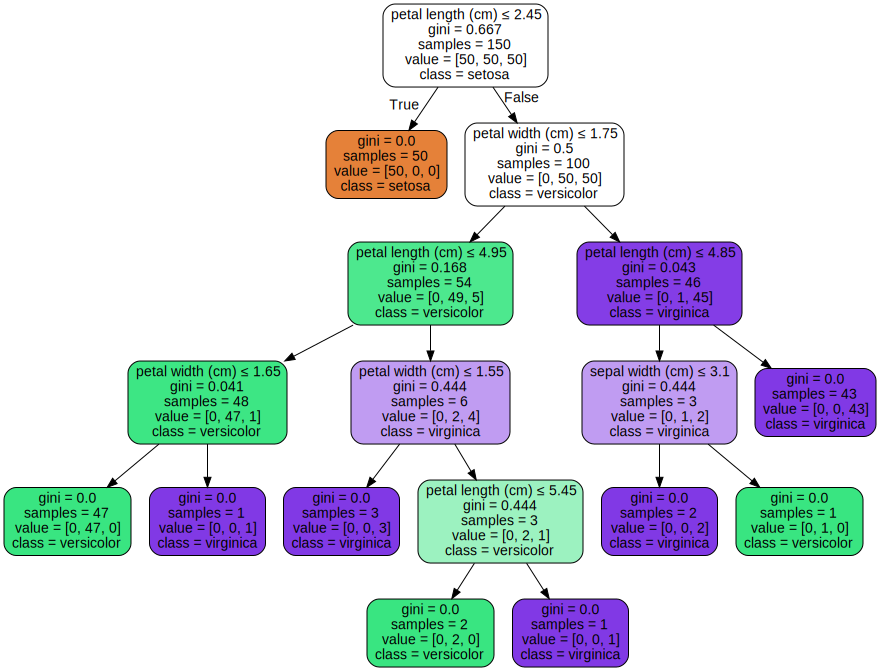

In [10]:
dot_data = tree.export_graphviz(my_classifier, out_file="tree.dot", 
                      feature_names=dataset.feature_names,  
                      class_names=dataset.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

# HyperParamters 
### Every model have a set of parameters that have to be set and there's no way of finding the optimal one in the first try , so later on we will use grid search to try a range of hyperparameters.
### I want to be absolutely clear, hyperparameters are NOT model parameters and they cannot be directly trained from the data. Model parameters are learned during training And hyperparameters are learned through tuning.
### they are the specific parts about the architecture  of the model.
### what's the optimal depth in my tree to use?
### How many layers should I have in my neural network?
### What should be the minimum number of samples required at a leaf node in my decision tree?


# HyperParameters in DecisionTrees
### criterion {“gini”, “entropy”}, default=”gini” The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
### max_leaf_nodesint, default=None Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
### This isn't meant to be a theoritical tutorial so let's try them!

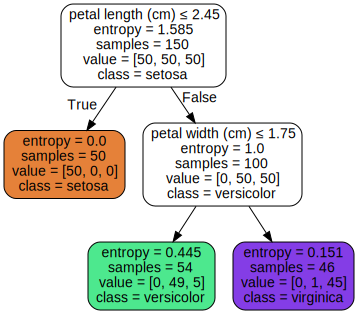

In [12]:
my_classifier = DecisionTreeClassifier(max_depth=2 , criterion="entropy" )
my_classifier = my_classifier.fit(features, labels)

dot_data = tree.export_graphviz(my_classifier, out_file="tree.dot", 
                      feature_names=dataset.feature_names,  
                      class_names=dataset.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### To Do Regression Tasks you use DecisionTreeRegressor() instead of classifier , note that it has another algorithms of learning like the squared error method , please refer to the documentation.





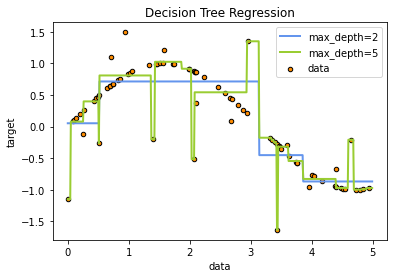

In [13]:
"""
this example is taken from : https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
We are trying to make a decision tree that maps the behaviour of a sin wave.

"""

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() #calculates sin() of some randomly generated values 
y[::5] += 3 * (0.5 - rng.rand(16)) #adds noise to the values

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data") #draws the values as (x,y) points on the figure
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()